In [4]:
# 加载模块
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [5]:
# 加载模块
import torch
# =====> 第一部分: 数据
from torch.utils.data import Dataset, TensorDataset, DataLoader
# =====> 第二部分: 搭建深度神经网络模型
import torch.nn as nn
from torch.nn import functional as F
# =====> 第三部分: 训练深度神经网络模型
import torch.optim as optim

In [231]:
num_inputs = 2
num_examples = 1000

In [232]:
# 设置随机数发生器使用的随机数种子
torch.manual_seed(55)

# 相关关系: corelation; 因果关系: causation
# 因果关系 = 相关关系 + 误差 => 因果关系 ~ 相关关系
w_true = torch.tensor([2., -1], dtype=torch.float32).reshape(2, 1)
b_true = torch.tensor(1., dtype=torch.float32)

# 特征张量和真实标签
features = torch.randn(size=(num_examples, num_inputs))
label_true = torch.mm(features, w_true) + b_true
# 假设模型的预测标签?
labels = label_true + torch.randn(size=label_true.shape) * 0.01

In [235]:
# 查看特征张量中的数据
# features.ndim
# features.shape
features[:10, :]

tensor([[ 1.8616,  0.9035],
        [ 1.3395,  1.2005],
        [ 1.0070,  0.2379],
        [-0.4197,  0.5358],
        [-0.3831,  2.1767],
        [ 0.9645,  0.4847],
        [-1.7431, -1.1125],
        [-0.0574, -1.6394],
        [-0.8720, -0.1476],
        [-0.2357,  0.5441]])

In [236]:
# 查看标签
labels[:10, :]

tensor([[ 3.8257],
        [ 2.5079],
        [ 2.7814],
        [-0.3586],
        [-1.9446],
        [ 2.4415],
        [-1.3692],
        [ 2.5107],
        [-0.5897],
        [-0.0282]])

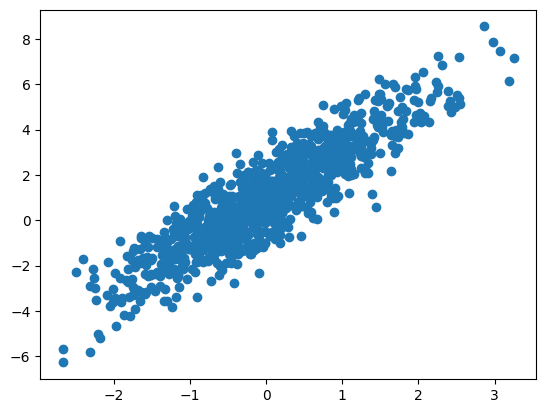

In [237]:
# 真实观测的数据是离散的点, 是一个一个的样本
plt.scatter(features[:, 0], labels)

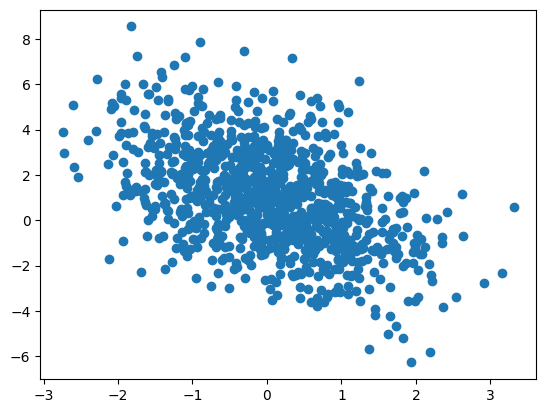

In [238]:
plt.scatter(features[:, 1], labels)

In [239]:
# 设置随机数发生器的随机数种子
torch.manual_seed(55)

# 预测变量-predictor, 响应变量-response
labels_1 = label_true + torch.randn(size=label_true.shape, dtype=torch.float32) * 2

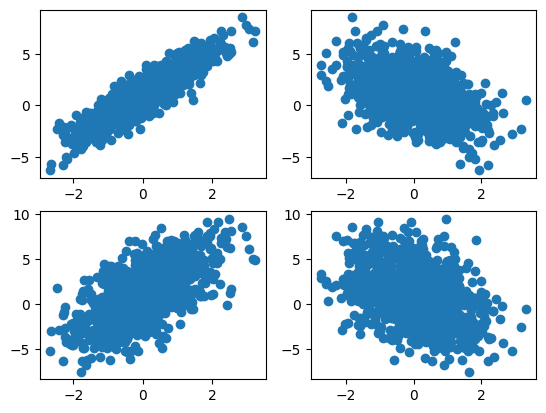

In [243]:
plt.subplot(221)  # ValueError: Single argument to subplot must be a three-digit integer, not 1
# 第一个特征和标签的散点图
plt.scatter(features[:, 0], labels)
plt.subplot(222)  # ValueError: num must be an integer with 1 <= num <= 1, not 2
# 第二个特征和标签的散点图
plt.scatter(features[:, 1], labels)

plt.subplot(223)
# 第一个特征和标签的散点图
plt.scatter(features[:, 0], labels_1)
plt.subplot(224)
# 第二个特征和标签的散点图
plt.scatter(features[:, 1], labels_1)

In [244]:
# 设置随机数发生器中的随机数种子
torch.manual_seed(55)

# 在计算机的内存中存储数值2 => 代表特征变量的个数
num_features = 2
# 在计算机的内存中存储数值1000 => 代表数据集中样本的个数
num_samples = 1000

# 非线性方程系数
w_true = torch.tensor(2., dtype=torch.float32)
b_true = torch.tensor(1., dtype=torch.float32)

# 特征张量X: 在计算机的内存中一次性存储1000*2个随机数, 随机数服从标准正态分布
X = torch.randn(size=(num_samples, num_features), dtype=torch.float32)
# 真实规律
y_true = torch.pow(X, 2) * w_true + b_true
# 观测 = 真实规律 + 噪声noise
y = y_true + torch.randn(size=y_true.shape) * 0.1

In [245]:
y_true.shape

torch.Size([1000, 2])

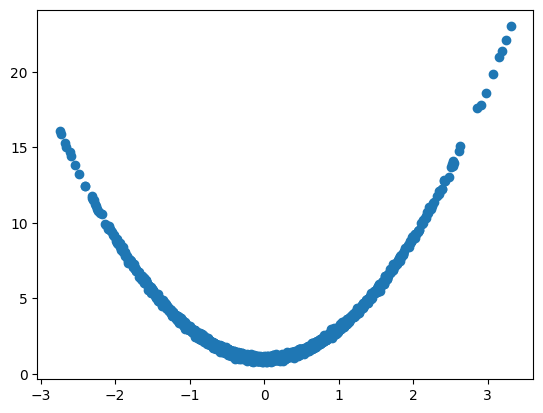

In [246]:
# 观测值是离散的点
plt.scatter(X, y)

##### 生成(synthesis)简单回归类任务的数据集

In [249]:
def tensorGenReg(num_samples=1000, w=[2, -1, 1], bias=True, delta=0.01, degree=1):
    """回归类任务数据集创建函数:
    @param num_samples: 数据集中的样本个数
    @param w: 数据集中特征变量前的权重, 包含截距项
    @param bias: 是否包含截距项
    @param delta: 控制噪声的大小
    @param degree: 每一个特征变量的系数

    @return: 特征张量X和标签张量y组成的元组
    """
    if bias:  # => bias 等于 True:
        num_features = len(w)-1
        features_true = torch.randn(size=(num_samples, num_features), dtype=torch.float32)
        w_true = torch.tensor(w[:-1]).reshape(-1, 1).float()
        b_true = torch.tensor(w[-1]).float()
        # labels_true表示客观规律值
        if num_features == 1:
            labels_true = torch.pow(features_true, degree) * w_true + b_true
        else:
            labels_true = torch.mm(torch.pow(features_true, degree), w_true) + b_true
        # 在特征张量的最后一列添加一列全是1的列
        features = torch.cat((features_true, torch.ones(size=(len(features_true), 1))), dim=1)
        # labels表示实际观测值
        labels = labels_true + torch.randn(size=labels_true.shape) * delta
        
    else:  # => bias 等于 False
        num_features = len(w)
        features_true = torch.randn(size=(num_samples, num_features), dtype=torch.float32)
        w_true = torch.tensor(w).reshape(-1, 1).float()
        if num_features == 1:
            label_true = torch.pow(features_true, degree) * w_true
        else:
            label_true = torch.mm(torch.pow(features_true, degree), w_true)
        features = features_true
        labels = label_true + torch.randn(size=label_true.shape) * delta

    return features, labels

In [250]:
torch.manual_seed(55)

features, labels = tensorGenReg(delta=0.01)

In [251]:
features

tensor([[ 1.8616,  0.9035,  1.0000],
        [ 1.3395,  1.2005,  1.0000],
        [ 1.0070,  0.2379,  1.0000],
        ...,
        [-0.0973, -0.4635,  1.0000],
        [ 0.1802, -0.3851,  1.0000],
        [-0.2370, -0.9159,  1.0000]])

In [252]:
labels

tensor([[ 3.8257e+00],
        [ 2.5079e+00],
        [ 2.7814e+00],
        [-3.5859e-01],
        [-1.9446e+00],
        [ 2.4415e+00],
        [-1.3692e+00],
        [ 2.5107e+00],
        [-5.8972e-01],
        [-2.8245e-02],
        [ 9.8198e-01],
        [ 2.7693e+00],
        [ 2.9154e+00],
        [ 2.2670e+00],
        [-1.3411e+00],
        [ 2.5609e+00],
        [-1.4516e+00],
        [ 2.2962e+00],
        [ 2.2133e-01],
        [ 5.7875e+00],
        [-8.4835e-01],
        [ 4.7310e-01],
        [ 1.3798e+00],
        [-4.6729e+00],
        [-5.7032e+00],
        [-2.8829e+00],
        [ 1.7803e+00],
        [ 3.0732e-01],
        [ 3.9779e+00],
        [ 5.7631e+00],
        [ 2.4994e+00],
        [ 1.7473e+00],
        [ 9.3775e-01],
        [ 3.1456e+00],
        [ 2.1137e+00],
        [ 5.5749e+00],
        [ 3.2032e+00],
        [-2.3906e-02],
        [-2.5766e+00],
        [ 3.7898e-01],
        [-2.8885e+00],
        [ 7.6100e-01],
        [-7.9940e-01],
        [-5

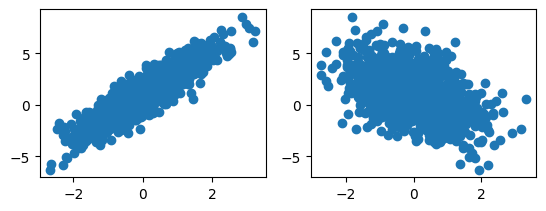

In [253]:
plt.subplot(223)
plt.scatter(features[:, 0], labels)
plt.subplot(224)
plt.scatter(features[:, 1], labels)

In [254]:
torch.manual_seed(55)

features, labels = tensorGenReg(delta=2)

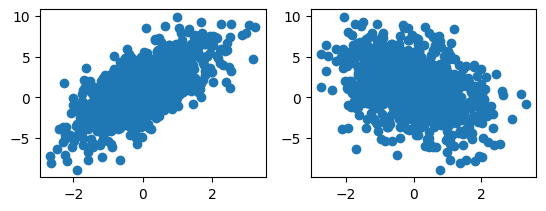

In [255]:
plt.subplot(223)
plt.scatter(features[:, 0], labels)
plt.subplot(224)
plt.scatter(features[:, 1], labels)

In [258]:
torch.manual_seed(55)

features, labels = tensorGenReg(degree=2)

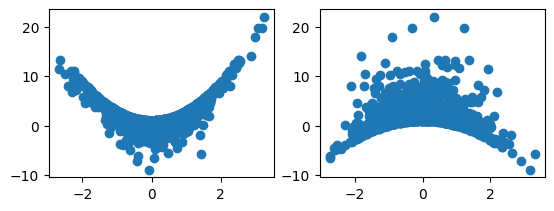

In [259]:
plt.subplot(223)
plt.scatter(features[:, 0], labels)
plt.subplot(224)
plt.scatter(features[:, 1], labels)

In [260]:
torch.manual_seed(55)

features, labels = tensorGenReg(w=[1], degree=2, bias=False)

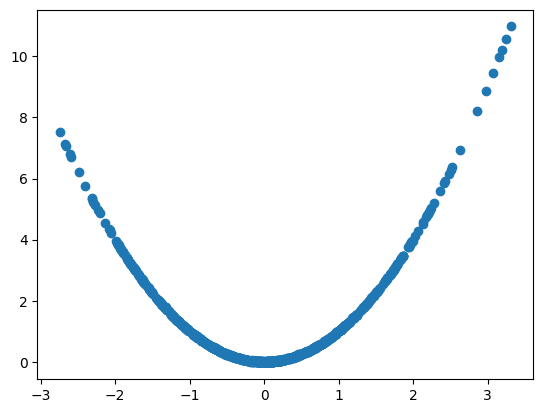

In [261]:
plt.scatter(features, labels)

##### 生成(synthesis)简单分类任务的数据集

In [262]:
# 在计算机的内存中一次性存储多个随机数, 然后将这些随机数按照指定的维度和形状存储在张量中. 随机数服从标准正态分布
torch.randn(size=(4, 2))

tensor([[ 1.3658, -0.3326],
        [ 0.0132,  0.5151],
        [-0.5278,  0.8826],
        [-1.5806, -0.1427]])

In [263]:
# 在计算机的内存中一次性存储多个随机数, 然后将这些随机数按照指定的维度和形状存储在张量中, 随机数服从某种正态分布
torch.normal(mean=4, std=2, size=(4, 2))

tensor([[1.5523, 3.8190],
        [3.7114, 4.3961],
        [3.6278, 6.3988],
        [4.9904, 3.3788]])

In [276]:
# 设置随机数发生器中的随机数种子
torch.manual_seed(55)

# 在计算机的内存中存储数值500 => 代表的是每一个分类下的样本个数
num_samples = 500
# 在计算机的内存中存储数值2 => 代表的是每一个样本有两个特征变量
num_features = 2

# 第一个类别的样本的两个特征变量(两个随机变量)都服从均值为4 标准差为2的正态分布
# 在计算机的内存中一次性存储500x2=1000个随机数 => 存储在数据结构张量中
X_0 = torch.normal(mean=4, std=2, size=(num_samples, num_features))

# 第二个类别的样本的两个特征变量(两个随机变量)都服从均值为-2 标准差为2的正态分布
X_1 = torch.normal(mean=-2, std=2, size=(num_samples, num_features))

# 第三个类别的样本的两个特征变量(两个随机变量)都服从均值为-6 标准差为2的正态分布
X_2 = torch.normal(mean=-6, std=2, size=(num_samples, num_features))

In [277]:
# 第一个类别的样本的标签
y_0 = torch.zeros(size=(num_samples, ))
# 第二个类别的样本的标签
y_1 = torch.ones(size=(num_samples, ))
# 第三个类别的样本的标签
y_2 = torch.full(size=(num_samples, ), fill_value=2)

In [278]:
torch.cat(tensors=(X_0, X_1, X_2), dim=0).shape

torch.Size([1500, 2])

In [279]:
torch.cat(tensors=(X_0, X_1, X_2), dim=1).shape

torch.Size([500, 6])

In [280]:
# 合并生成特征张量
X = torch.cat(tensors=(X_0, X_1, X_2), dim=0).float()
# 合并生成标签
y = torch.cat(tensors=(y_0, y_1, y_2), dim=0).long().reshape(-1, 1)

In [281]:
X

tensor([[  7.7232,   5.8071],
        [  6.6789,   6.4009],
        [  6.0140,   4.4758],
        ...,
        [ -4.7198,  -3.8372],
        [ -7.1955, -10.1975],
        [ -5.0489,  -6.6953]])

In [282]:
y

tensor([[0],
        [0],
        [0],
        ...,
        [2],
        [2],
        [2]])

In [283]:
X[:10, ]

tensor([[7.7232, 5.8071],
        [6.6789, 6.4009],
        [6.0140, 4.4758],
        [3.1606, 5.0716],
        [3.2338, 8.3534],
        [5.9291, 4.9694],
        [0.5139, 1.7749],
        [3.8852, 0.7211],
        [2.2559, 3.7048],
        [3.5286, 5.0883]])

In [284]:
y[:10, ]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

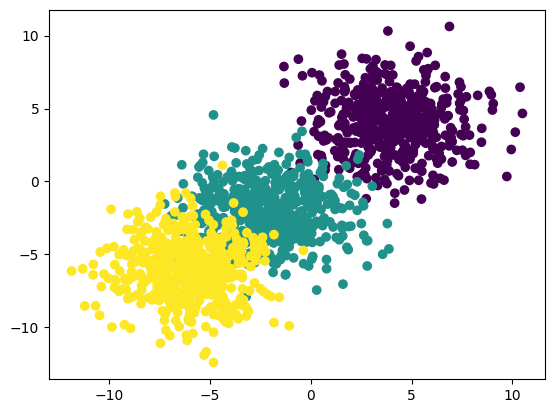

In [285]:
# 观测样本是以高维空间中的点的形式存在的
plt.scatter(X[:, 0], X[:, 1], c=y)

In [286]:
torch.manual_seed(55)

num_samples = 500
num_features = 2

X_0 = torch.normal(mean=3, std=2, size=(num_samples, num_features))
X_1 = torch.normal(mean=0, std=2, size=(num_samples, num_features))
X_2 = torch.normal(mean=-3, std=2, size=(num_samples, num_features))

y_0 = torch.zeros(size=(num_samples, ))
y_1 = torch.ones(size=(num_samples, ))
y_2 = torch.full(size=(num_samples, ), fill_value=2)

X_ = torch.cat(tensors=(X_0, X_1, X_2), dim=0).float()
y_ = torch.cat(tensors=(y_0, y_1, y_2), dim=0).reshape(-1, 1).long()

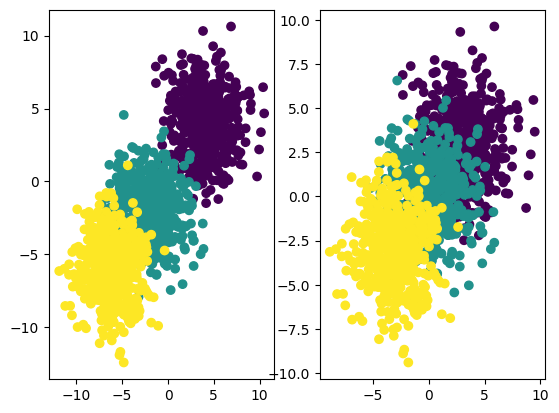

In [287]:
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(122)
plt.scatter(X_[:, 0], X_[:, 1], c=y_)

In [6]:
def tensorGenCla(num_samples=500, num_features=2, num_classes=3, deg_dispersion=[4, 2], bias=False):
    """生成基础的分类任务数据集的函数

    @param num_samples: 数据集中样本的个数
    @param num_features: 数据集中每一个样本的特征变量的个数
    @param num_classes: 数据集中每一个样本的分类的个数
    @param deg_dispersion: 各个类别标签下的数据样本点的均值和标准差的参考数值
    @param bias: 逻辑回归模型是否包含截距项

    @return: 特征张量和标签
    """
    # 每一个类别下的数据样本点的均值参考值
    mean_ = deg_dispersion[0]
    # 每一个类别下的数据样本点的标准差参考值
    std_ = deg_dispersion[1]
    # 将每一个类别下的特征张量按照顺序存储在列表中
    X_lst = []
    # 将每一个类别下的标签按照顺序存储在列表中
    y_lst = []

    # 不同的类别的数据样本点的均值不同
    k = mean_ * (num_classes-1) / 2

    for i in range(num_classes):  # 0 1 2
        # 在计算机的内存中一次性存储num_samples x num_features个随机数
        # 随机数来自于一个随机变量, 服从指定均值和制定标准差的正态分布
        X_temp = torch.normal(mean=i*mean_-k, std=std_, size=(num_samples, num_features))
        X_lst.append(X_temp)
        # 在计算机的内存中一次性存储num_samples x 1个与i相同的整数值
        y_temp = torch.full(size=(num_samples, ), fill_value=i)
        y_lst.append(y_temp)

    # 合并生成完整的数据集
    X = torch.cat(tensors=X_lst, dim=0).float()
    y = torch.cat(tensors=y_lst, dim=0).reshape(-1, 1).long()

    if bias:  # bias 等于 True
        X = torch.cat(tensors=(X, torch.ones(size=(len(X), 1))), dim=1)

    return X, y

In [7]:
X, y = tensorGenCla(num_classes=2, bias=True)

In [8]:
X.ndim

2

In [9]:
X.shape

torch.Size([1000, 3])

In [10]:
X

tensor([[ 0.0398, -4.6745,  1.0000],
        [-5.5106, -3.3660,  1.0000],
        [-5.3324, -1.6329,  1.0000],
        ...,
        [ 2.3548,  1.7923,  1.0000],
        [ 1.7124,  2.1273,  1.0000],
        [-0.7963,  6.0991,  1.0000]])

In [289]:
torch.empty(size=(4, 2))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [291]:
torch.manual_seed(55)

X1, y1 = tensorGenCla(deg_dispersion=[6, 2])  # 离散程度由标准差控制
X2, y2 = tensorGenCla(deg_dispersion=[6, 4])

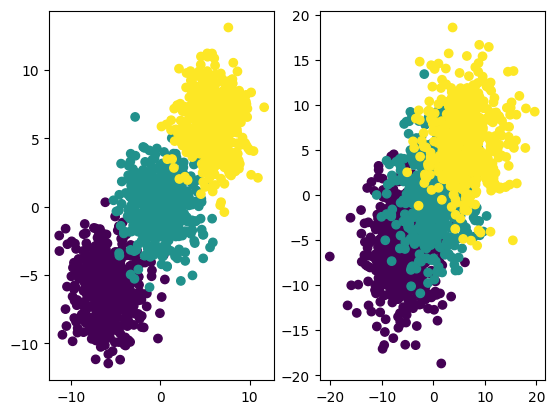

In [292]:
plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)

plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

In [293]:
range(5)

range(0, 5)

In [294]:
lst = list(range(5))
lst

[0, 1, 2, 3, 4]

In [297]:
# 加载模块
import random

# 使用模块中的函数
random.shuffle(lst)
lst

[4, 1, 2, 3, 0]

In [298]:
"hello".split()

['hello']

##### 将完整的数据集划分为若干个互不相交的子数据集

In [299]:
# 加载模块
import random

def split_dataset(batch_size, X, y):
    """将完整的数据集(特征张量, 标签)按照相同的大小, 划分为若干个互不相交的子集
    @param batch_size: 每一个子数据集中样本的个数
    @param X: 包含所有样本的特征张量
    @param y: 包含所有样本的标签

    @return batched_dataset: 列表, 包含有一定数量的元组, 每一个元组的第一个元素是子集的特征张量, 第二个元素是子集的标签
    """
    # 数据集中样本的数量
    num_samples = len(X)
    # 获取所有样本的对应的索引
    indices = list(range(num_samples))
    # 打乱顺序排序的样本索引
    random.shuffle(indices)

    batched_dataset = []
    for i in range(0, num_samples, batch_size):  # 每一次都可以通过索引i:i+batch_size获取batch_size个样本
        sample_indices = torch.tensor(indices[i: min(i+batch_size, num_samples)], dtype=torch.int32)
        batched_dataset.append((torch.index_select(input=X, dim=0, index=sample_indices), torch.index_select(input=y, dim=0, index=sample_indices)))

    return batched_dataset

In [300]:
for i in range(0, 5, 2):  # 0 2 4
    print(i)

0
2
4


In [301]:
torch.manual_seed(55)

# 生成二分类数据集
X, y = tensorGenCla()

In [302]:
X[:5, ]

tensor([[-0.2768, -2.1929],
        [-1.3211, -1.5991],
        [-1.9860, -3.5242],
        [-4.8394, -2.9284],
        [-4.7662,  0.3534]])

In [303]:
y[:5, ]

tensor([[0],
        [0],
        [0],
        [0],
        [0]])

In [304]:
batched_dataset = split_dataset(batch_size=10, X=X, y=y)

In [305]:
batched_dataset[0]

(tensor([[ 6.0985,  5.0005],
         [ 4.5513,  3.6614],
         [ 1.1575,  1.5447],
         [ 0.4824, -1.0938],
         [ 5.7845,  6.7593],
         [ 3.1057, -1.1151],
         [ 4.0540,  3.0987],
         [ 0.8664, -1.1436],
         [-1.1305, -3.6773],
         [-1.8785,  3.8617]]),
 tensor([[2],
         [2],
         [1],
         [1],
         [2],
         [1],
         [2],
         [1],
         [1],
         [2]]))

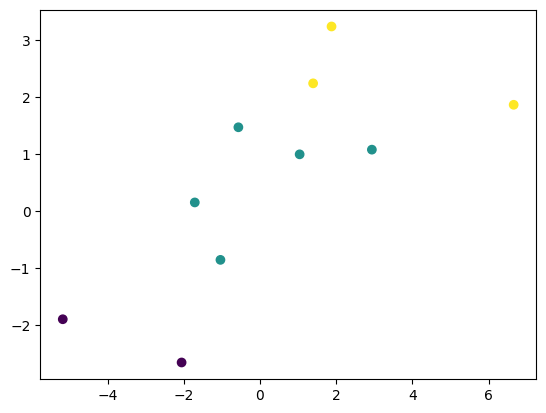

In [306]:
plt.scatter(batched_dataset[5][0][:, 0], batched_dataset[5][0][:, 1], c=batched_dataset[5][1])